In [30]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [31]:
df = pd.read_csv('C:/Users/User/Desktop/winequality-red.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
print("\nКоличество пропущенных значений в каждом столбце:")
print(df.isna().sum())


Количество пропущенных значений в каждом столбце:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


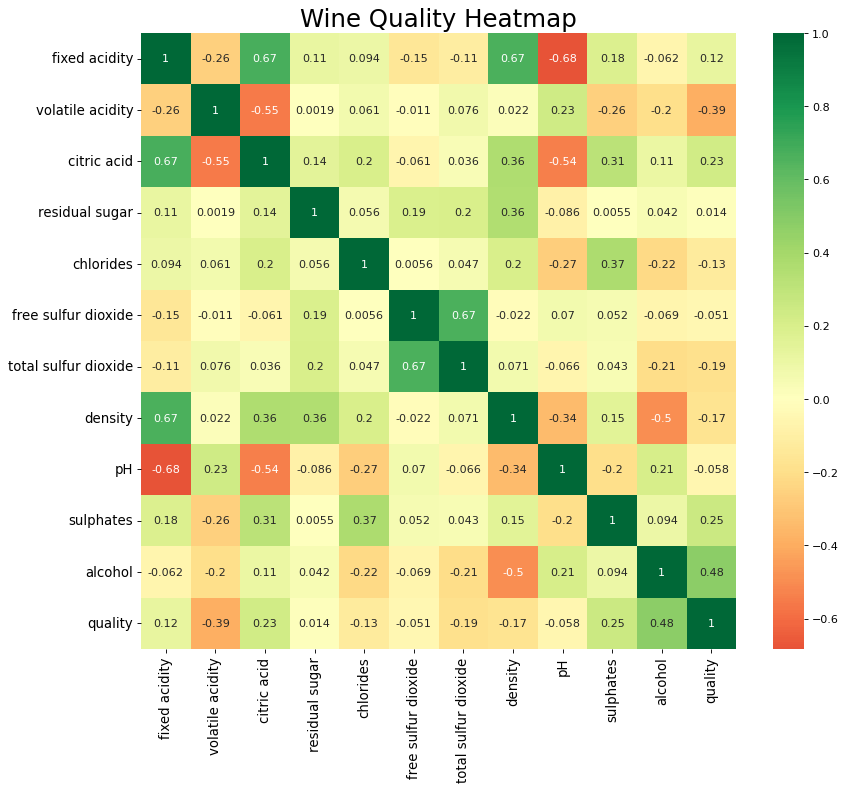

In [17]:
heatdf = df
plt.figure(figsize = (12,10), dpi = 80)
sns.heatmap(heatdf.corr(), xticklabels = heatdf.corr().columns, yticklabels = heatdf.corr().columns, cmap = 'RdYlGn', center = 0, annot = True)
plt.title('Wine Quality Heatmap', fontsize = 22)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

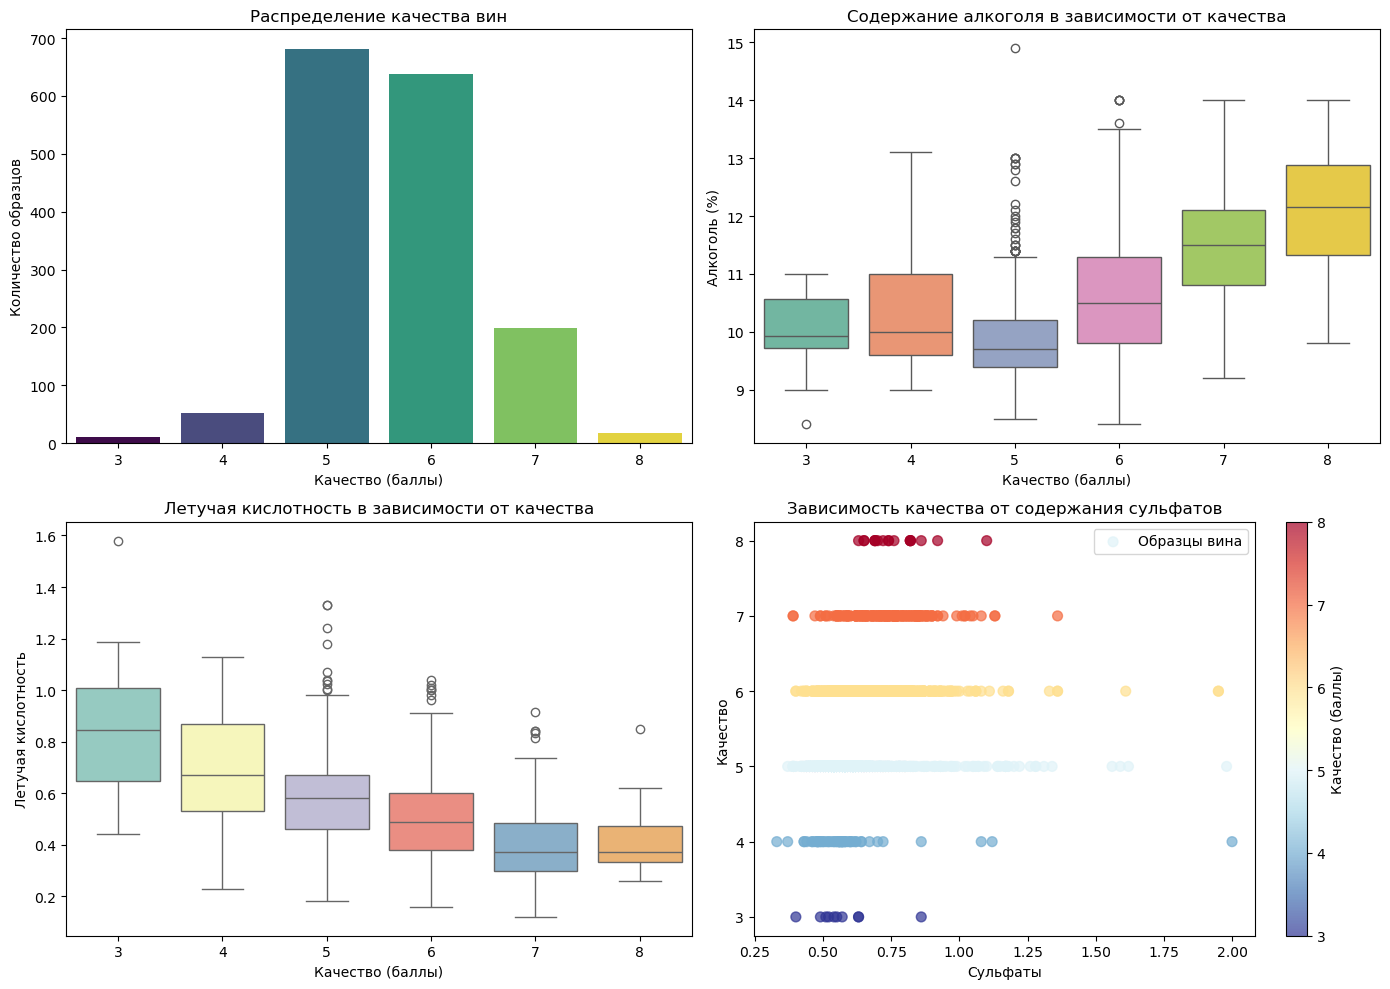

In [22]:
fig, axes = plt.subplots(2, 2, figsize = (14, 10))

sns.countplot(data = df, x = 'quality', hue = 'quality', ax = axes[0, 0], palette = 'viridis', legend = False)
axes[0, 0].set_title('Распределение качества вин')
axes[0, 0].set_xlabel('Качество (баллы)')
axes[0, 0].set_ylabel('Количество образцов')

sns.boxplot(data = df, x = 'quality', y = 'alcohol', hue = 'quality', ax = axes[0, 1], palette = 'Set2', legend = False)
axes[0, 1].set_title('Содержание алкоголя в зависимости от качества')
axes[0, 1].set_xlabel('Качество (баллы)')
axes[0, 1].set_ylabel('Алкоголь (%)')

sns.boxplot(data = df, x = 'quality', y = 'volatile acidity', hue = 'quality', ax = axes[1, 0], palette = 'Set3', legend = False)
axes[1, 0].set_title('Летучая кислотность в зависимости от качества')
axes[1, 0].set_xlabel('Качество (баллы)')
axes[1, 0].set_ylabel('Летучая кислотность')

scatter = axes[1, 1].scatter(df['sulphates'], df['quality'], c = df['quality'], cmap = 'RdYlBu_r', alpha = 0.7, s = 50, label = 'Образцы вина')  
axes[1, 1].set_title(f'Зависимость качества от содержания сульфатов')
axes[1, 1].set_xlabel('Сульфаты')
axes[1, 1].set_ylabel('Качество')
axes[1, 1].legend(loc = 'best') 
cbar = plt.colorbar(scatter, ax = axes[1, 1])
cbar.set_label('Качество (баллы)')

plt.tight_layout()
plt.show()

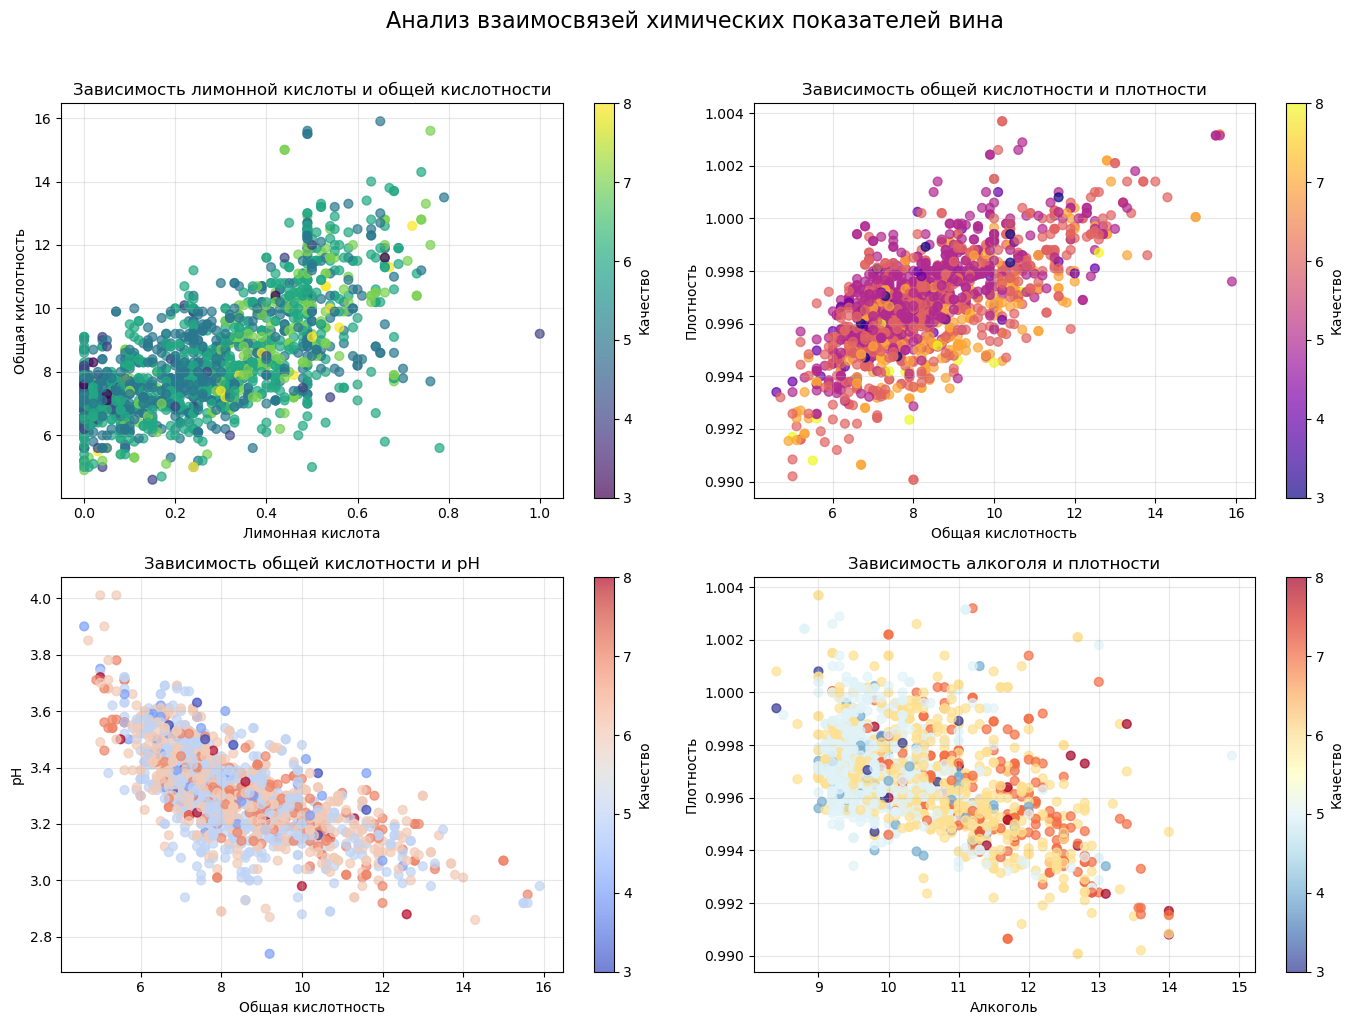

In [27]:
fig, axes = plt.subplots(2, 2, figsize = (14, 10))
fig.suptitle('Анализ взаимосвязей химических показателей вина', fontsize = 16, y = 1.02)

scatter1 = axes[0, 0].scatter(df['citric acid'], df['fixed acidity'], c = df['quality'], cmap = 'viridis', alpha = 0.7, s = 40)
axes[0, 0].set_title(f'Зависимость лимонной кислоты и общей кислотности')
axes[0, 0].set_xlabel('Лимонная кислота')
axes[0, 0].set_ylabel('Общая кислотность')
axes[0, 0].grid(True, alpha=0.3)
cbar1 = plt.colorbar(scatter1, ax=axes[0, 0])
cbar1.set_label('Качество')

scatter2 = axes[0, 1].scatter(df['fixed acidity'], df['density'], c = df['quality'], cmap = 'plasma', alpha = 0.7, s = 40)
axes[0, 1].set_title(f'Зависимость общей кислотности и плотности')
axes[0, 1].set_xlabel('Общая кислотность')
axes[0, 1].set_ylabel('Плотность')
axes[0, 1].grid(True, alpha = 0.3)
cbar2 = plt.colorbar(scatter2, ax = axes[0, 1])
cbar2.set_label('Качество')

scatter3 = axes[1, 0].scatter(df['fixed acidity'], df['pH'], c = df['quality'], cmap = 'coolwarm', alpha = 0.7, s = 40)
axes[1, 0].set_title(f'Зависимость общей кислотности и pH')
axes[1, 0].set_xlabel('Общая кислотность')
axes[1, 0].set_ylabel('pH')
axes[1, 0].grid(True, alpha=0.3)
cbar3 = plt.colorbar(scatter3, ax=axes[1, 0])
cbar3.set_label('Качество')

scatter4 = axes[1, 1].scatter(df['alcohol'], df['density'], c = df['quality'], cmap = 'RdYlBu_r', alpha = 0.7, s = 40)
axes[1, 1].set_title(f'Зависимость алкоголя и плотности')
axes[1, 1].set_xlabel('Алкоголь')
axes[1, 1].set_ylabel('Плотность')
axes[1, 1].grid(True, alpha=0.3)
cbar4 = plt.colorbar(scatter4, ax=axes[1, 1])
cbar4.set_label('Качество')

plt.tight_layout()
plt.show()

In [32]:
from sklearn.linear_model import Ridge, Lasso

X = df.drop('quality', axis = 1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge = Ridge(alpha = 1.0)  
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

lasso = Lasso(alpha = 1.0) 
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_ridge = r2_score(y_test, y_pred_ridge)
r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_ridge = np.sqrt(mse_ridge)
rmse_lasso = np.sqrt(mse_lasso)

In [33]:
from sklearn.linear_model import LinearRegression

X = df.drop('quality', axis = 1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
rmse = np.sqrt(mse)


In [34]:
from sklearn.svm import SVR

X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(kernel = 'rbf', C = 1.0, epsilon = 0.1)#kernel - радиальная базисная функция, с - регуляризация, epsilon - допустимая ошибка 
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)

In [35]:
print(f"linear")
print("-"*40)
print(f"Ridge, Lasso")
print(f"MSE(Ridge): {mse_ridge:.4f}")
print(f"MSE(Lasso): {mse_lasso:.4f}")
print(f"MAE(Ridge): {mae_ridge:.4f}")
print(f"MAE(Lasso): {mae_lasso:.4f}")
print(f"R²(Ridge): {r2_ridge:.4f}")
print(f"R²(Lasso): {r2_lasso:.4f}")
print(f"RMSE(Ridge): {rmse_ridge:.4f}")
print(f"RMSE(Lasso): {rmse_lasso:.4f}")
print("-"*40)
print(f"LinearRegression")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print("-"*40)
print(f"SVR")
print(f"MSE:  {mse_svr:.4f}")
print(f"MAE:  {mae_svr:.4f}")
print(f"R²:   {r2_svr:.4f}")
print(f"RMSE: {rmse_svr:.4f}")

linear
----------------------------------------
Ridge, Lasso
MSE(Ridge): 0.3900
MSE(Lasso): 0.6572
MAE(Ridge): 0.5036
MAE(Lasso): 0.6853
R²(Ridge): 0.4032
R²(Lasso): -0.0056
RMSE(Ridge): 0.6245
RMSE(Lasso): 0.8107
----------------------------------------
LinearRegression
Mean Squared Error: 0.3900
Mean Absolute Error: 0.5035
R² Score: 0.4032
RMSE: 0.6245
----------------------------------------
SVR
MSE:  0.3514
MAE:  0.4535
R²:   0.4623
RMSE: 0.5928


In [36]:
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression  

df['quality_category'] = pd.cut(df['quality'], bins = [2, 4, 6, 8], labels = ['Плохое', 'Среднее', 'Хорошее'])

X = df.drop(['quality', 'quality_category'], axis = 1)
y = df['quality_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge_clf = RidgeClassifier(alpha = 1.0, random_state = 42)
ridge_clf.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_clf.predict(X_test_scaled)

lasso_clf = LogisticRegression(penalty = 'l1', C = 1.0, solver = 'liblinear', random_state = 42, max_iter = 1000)
lasso_clf.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_clf.predict(X_test_scaled)

accuracy_ridge = accuracy_score(y_test, y_pred_ridge)
accuracy_lasso = accuracy_score(y_test, y_pred_lasso)
precision_ridge = precision_score(y_test, y_pred_ridge, average = 'weighted', zero_division = 0)
precision_lasso = precision_score(y_test, y_pred_lasso, average = 'weighted', zero_division = 0)
recall_ridge = recall_score(y_test, y_pred_ridge, average = 'weighted', zero_division = 0)
recall_lasso = recall_score(y_test, y_pred_lasso, average = 'weighted', zero_division = 0)
f1_ridge = f1_score(y_test, y_pred_ridge, average = 'weighted', zero_division = 0)
f1_lasso = f1_score(y_test, y_pred_lasso, average = 'weighted', zero_division = 0)


In [37]:
from sklearn.multiclass import OneVsRestClassifier

df['quality_category'] = pd.cut(df['quality'], bins = [2, 4, 6, 8], labels = ['Плохое', 'Среднее', 'Хорошее'])

X = df.drop(['quality', 'quality_category'], axis = 1)
y = df['quality_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

constr = LogisticRegression(max_iter=1000, random_state=42, multi_class='ovr', solver='liblinear')
log_reg = OneVsRestClassifier(constr)

log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
f1_weighted = f1_score(y_test, y_pred, average='weighted')



In [38]:
from sklearn.svm import SVC

df['quality_category'] = pd.cut(df['quality'], bins = [2, 4, 6, 8], labels = ['Плохое', 'Среднее', 'Хорошее'])

X = df.drop(['quality', 'quality_category'], axis = 1)
y = df['quality_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc_rbf = SVC(kernel = 'rbf', C = 1.0, random_state = 42, probability = True)
svc_rbf.fit(X_train_scaled, y_train)
y_pred_svc_rbf = svc_rbf.predict(X_test_scaled)
y_pred_proba_svc_rbf = svc_rbf.predict_proba(X_test_scaled)

accuracy_rbf = accuracy_score(y_test, y_pred_svc_rbf)
precision_rbf = precision_score(y_test, y_pred_svc_rbf, average = 'weighted', zero_division = 0)
recall_rbf = recall_score(y_test, y_pred_svc_rbf, average = 'weighted', zero_division = 0)
f1_rbf = f1_score(y_test, y_pred_svc_rbf, average = 'weighted', zero_division = 0)


In [40]:
print(f"classifier")
print("-"*40)
print(f"Ridge, Lasso")
print(f"Accuracy:  {accuracy_ridge:.4f}")
print(f"Accuracy:  {accuracy_lasso:.4f}")
print(f"Precision: {precision_ridge:.4f}")
print(f"Precision: {precision_lasso:.4f}")
print(f"Recall:    {recall_ridge:.4f}")
print(f"Recall:    {recall_lasso:.4f}")
print(f"F1-Score:  {f1_ridge:.4f}")
print(f"F1-Score:  {f1_lasso:.4f}")
print("-"*40)
print("Logistic Regression")
print(f"Accuracy:       {accuracy:.4f}")
print(f"Precision:      {precision_weighted:.4f}")
print(f"Recall:         {recall_weighted:.4f}")
print(f"F1-Score:       {f1_weighted:.4f}")
print("-"*40)
print("SVC")
print(f"Accuracy:  {accuracy_rbf:.4f}")
print(f"Precision: {precision_rbf:.4f}")
print(f"Recall:    {recall_rbf:.4f}")
print(f"F1-Score:  {f1_rbf:.4f}")
print(f"Количество опорных векторов: {len(svc_rbf.support_)}")

classifier
----------------------------------------
Ridge, Lasso
Accuracy:  0.8344
Accuracy:  0.8375
Precision: 0.7866
Precision: 0.7863
Recall:    0.8344
Recall:    0.8375
F1-Score:  0.7761
F1-Score:  0.8045
----------------------------------------
Logistic Regression
Accuracy:       0.8406
Precision:      0.7910
Recall:         0.8406
F1-Score:       0.8090
----------------------------------------
SVC
Accuracy:  0.8500
Precision: 0.8040
Recall:    0.8500
F1-Score:  0.8219
Количество опорных векторов: 563
